## 日本語サマリー（200〜400字）

USGSが公開している世界の地震データを使い、マグニチュードと震源の深さの関係を可視化した。データを取得して整理し、散布図で表示することで、地震の規模と深さの分布を一目で確認できるようにした。グラフを見てみると、多くの地震は浅い場所で起きているが、まれに300kmを超える深い地震も発生していることが分かった。また、規模が大きい地震が必ずしも深いとは限らず、浅い場所でも大きな地震が起きている点が印象的だった。今回の分析を通して、地震の発生には地域や深さによる特徴があることを視覚的に理解できた。


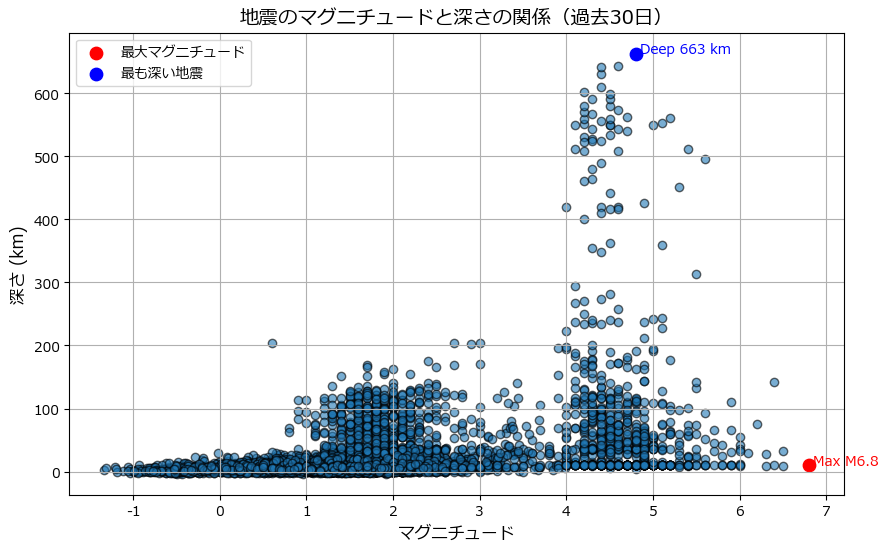

In [4]:
# --- ライブラリのインポート ---
import pandas as pd
import matplotlib.pyplot as plt

# --- 日本語フォント設定（Windows対応） ---
plt.rcParams['font.family'] = 'Meiryo'       # メイリオフォントで日本語対応
plt.rcParams['axes.unicode_minus'] = False   # マイナス記号の文字化け防止

# --- USGSの地震データを取得 ---
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# --- データ整形 ---
df["mag"] = pd.to_numeric(df["mag"], errors="coerce")     # 数値に変換
df["depth"] = pd.to_numeric(df["depth"], errors="coerce") # 数値に変換
df = df.dropna(subset=["mag", "depth"])                   # 欠損データを除外

# --- 最大マグニチュードと最も深い地震を特定 ---
max_mag_idx = df["mag"].idxmax()
deepest_idx = df["depth"].idxmax()
max_mag_row = df.loc[max_mag_idx]
deepest_row = df.loc[deepest_idx]

# --- グラフ作成 ---
plt.figure(figsize=(10, 6))
plt.scatter(df["mag"], df["depth"], alpha=0.6, edgecolor="k")

# 軸ラベルとタイトル
plt.xlabel("マグニチュード", fontsize=12)
plt.ylabel("深さ (km)", fontsize=12)
plt.title("地震のマグニチュードと深さの関係（過去30日）", fontsize=14)

# 重要な地震をマーク
plt.scatter(max_mag_row["mag"], max_mag_row["depth"], color="red", s=80, label="最大マグニチュード")
plt.scatter(deepest_row["mag"], deepest_row["depth"], color="blue", s=80, label="最も深い地震")

# ラベル表示
plt.text(max_mag_row["mag"] + 0.05, max_mag_row["depth"],
         f'Max M{max_mag_row["mag"]:.1f}', color="red", fontsize=10)
plt.text(deepest_row["mag"] + 0.05, deepest_row["depth"],
         f'Deep {deepest_row["depth"]:.0f} km', color="blue", fontsize=10)

# 凡例とグリッド
plt.legend()
plt.grid(True)
plt.show()



# 世界の地震データの可視化

このノートブックでは、USGS（アメリカ地質調査所）が公開している
過去30日間の地震データを取得し、地震の規模（マグニチュード）と
震源の深さとの関係をグラフで可視化します。

世界中で起きている地震の分布を確認することで、
「どのくらいの深さでどの程度の地震が起きやすいのか」や、
「強い地震がどんな特徴を持つのか」を直感的に理解することを目的としています。

